In [1]:
## Notebook env: mirtud_env (mirtud_env kernel)
## This notebook is used to assess the enrichment of genes' shap values from  MAVE model in annotated miR family targets (from TargetScan 6.2)

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
%load_ext rpy2.ipython

During startup - Warning messages:
1: package ‘methods’ was built under R version 4.2.2 
2: package ‘datasets’ was built under R version 4.2.2 
3: package ‘utils’ was built under R version 4.2.2 
4: package ‘grDevices’ was built under R version 4.2.2 
5: package ‘graphics’ was built under R version 4.2.2 
6: package ‘stats’ was built under R version 4.2.2 


In [2]:
sc.settings.verbosity = 3        # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.2 scikit-learn==1.2.0 statsmodels==0.13.5 pynndescent==0.5.8


In [3]:
adata = sc.read('/home/ssobti/projects/mir_tud/010523_filtered_data/miR.concat.raw.adata_gex.guide_assigned.h5ad')

Only considering the two last: ['.guide_assigned', '.h5ad'].
Only considering the two last: ['.guide_assigned', '.h5ad'].


In [4]:
adata2 = sc.read('/home/ssobti/projects/mir_tud/010523_filtered_data/miR.integrated.qc_norm_scaled.dimred.clustered.gex.guide_assigned.h5ad')

Only considering the two last: ['.guide_assigned', '.h5ad'].
Only considering the two last: ['.guide_assigned', '.h5ad'].


/home/ssobti/miniconda3/envs/mirtud_env/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [5]:
adata2.obs

,orig.ident,nCount_RNA,nFeature_RNA,sample,barcode,guide,lor,pvalue,adj_pvalue,max_umi,...,m_umi,v_umi,log_max_umi,log_n_umi,log_m_umi,percent.mt,integrated_snn_res.0.5,seurat_clusters,guide_group,miR.family
miR_1:AAACCCAAGGAGAGGC-1,miR,33954.0,5998,miR_1,AAACCCAAGGAGAGGC,hsa-miR-203a-3p,5.453121,2.983000e-159,3.010603e-152,67.0,...,0.196474,11.324937,1.826075,1.892095,-0.706696,8.576309,2,T2,target,miR-203a-3p.1
miR_1:AAACCCAAGGTAAACT-1,miR,31928.0,6868,miR_1,AAACCCAAGGTAAACT,hsa-miR-93-3p,6.012001,3.907611e-225,3.943769e-218,97.0,...,0.272040,23.713686,1.986772,2.033424,-0.565367,6.549110,0,T0,target,miR-93-3p
miR_1:AAACCCACAACGATCT-1,miR,42785.0,7447,miR_1,AAACCCACAACGATCT,hsa-miR-130b-3p,5.864701,3.299362e-202,3.329893e-195,89.0,...,0.284635,19.981910,1.949390,2.053078,-0.545712,8.844221,0,T0,target,miR-130-3p/301-3p/454-3p
miR_1:AAACCCACACGATTCA-1,miR,58537.0,8039,miR_1,AAACCCACACGATTCA,TuD_NC_18,5.859895,2.574602e-201,2.598426e-194,96.0,...,0.287154,23.235516,1.982271,2.056905,-0.541886,10.072262,1,control,control,NA
miR_1:AAACCCACAGTCAACT-1,miR,31579.0,6580,miR_1,AAACCCACAGTCAACT,hsa-miR-147b-5p,5.632808,3.564463e-178,3.597446e-171,71.0,...,0.216625,12.725683,1.851258,1.934498,-0.664292,7.698154,8,T8,target,miR-147b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
miR_3:TTTGGTTTCGGACTTA-1,miR,25937.0,5525,miR_3,TTTGGTTTCGGACTTA,hsa-miR-616-5p,3.885564,8.005527e-277,6.410418e-270,129.0,...,0.596977,44.983627,2.110590,2.374748,-0.224042,9.179936,9,T9,target,miR-371b-5p/373-5p/616-5p
miR_3:TTTGTTGCACGCGTGT-1,miR,82115.0,8826,miR_3,TTTGTTGCACGCGTGT,hsa-miR-361-5p,0.506602,8.834341e-07,1.000000e+00,2.0,...,0.030227,0.034438,0.301030,1.079181,-1.519609,7.640504,6,T6,target,miR-361-5p
miR_3:TTTGTTGCATAGATCC-1,miR,34833.0,6430,miR_3,TTTGTTGCATAGATCC,hsa-miR-548o-3p,6.603449,5.795787e-306,4.640971e-299,126.0,...,0.400504,40.028586,2.100371,2.201397,-0.397393,7.119685,2,T2,target,miR-1323
miR_3:TTTGTTGGTCTAGTGT-1,miR,22318.0,5103,miR_3,TTTGTTGGTCTAGTGT,hsa-miR-3940-5p,2.402414,5.349572e-125,4.283664e-118,58.0,...,0.277078,9.251317,1.763428,2.041393,-0.557398,8.826956,7,T7,target,miR-3940-5p/4507


In [6]:
## make sure to only keep that were present in Larisa's normalized data
cells_to_keep = [cell for cell in adata2.obs.index.to_list() if cell in adata.obs.index.to_list()]
adata = adata[cells_to_keep,:]

In [7]:
list(adata.obs.index) == list(adata2.obs.index)

True

In [8]:
adata.obs.loc[:,'guide'] = adata2.obs.loc[:,'miR.family']

/tmp/ipykernel_3312874/2483903368.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  adata.obs.loc[:,'guide'] = adata2.obs.loc[:,'miR.family']


In [9]:
adata.obs

,sample,barcode,guide,lor,pvalue,adj_pvalue,max_umi,n_umi,m_umi,v_umi,log_max_umi,log_n_umi,log_m_umi
miR_1:AAACCCAAGGAGAGGC-1,miR_1,AAACCCAAGGAGAGGC,miR-203a-3p.1,5.453121,2.983000e-159,3.010603e-152,67.0,78.0,0.196474,11.324937,1.826075,1.892095,-0.706696
miR_1:AAACCCAAGGTAAACT-1,miR_1,AAACCCAAGGTAAACT,miR-93-3p,6.012001,3.907611e-225,3.943769e-218,97.0,108.0,0.272040,23.713686,1.986772,2.033424,-0.565367
miR_1:AAACCCACAACGATCT-1,miR_1,AAACCCACAACGATCT,miR-130-3p/301-3p/454-3p,5.864701,3.299362e-202,3.329893e-195,89.0,113.0,0.284635,19.981910,1.949390,2.053078,-0.545712
miR_1:AAACCCACACGATTCA-1,miR_1,AAACCCACACGATTCA,NA,5.859895,2.574602e-201,2.598426e-194,96.0,114.0,0.287154,23.235516,1.982271,2.056905,-0.541886
miR_1:AAACCCACAGTCAACT-1,miR_1,AAACCCACAGTCAACT,miR-147b,5.632808,3.564463e-178,3.597446e-171,71.0,86.0,0.216625,12.725683,1.851258,1.934498,-0.664292
...,...,...,...,...,...,...,...,...,...,...,...,...,...
miR_3:TTTGGTTTCGGACTTA-1,miR_3,TTTGGTTTCGGACTTA,miR-371b-5p/373-5p/616-5p,3.885564,8.005527e-277,6.410418e-270,129.0,237.0,0.596977,44.983627,2.110590,2.374748,-0.224042
miR_3:TTTGTTGCACGCGTGT-1,miR_3,TTTGTTGCACGCGTGT,miR-361-5p,0.506602,8.834341e-07,1.000000e+00,2.0,12.0,0.030227,0.034438,0.301030,1.079181,-1.519609
miR_3:TTTGTTGCATAGATCC-1,miR_3,TTTGTTGCATAGATCC,miR-1323,6.603449,5.795787e-306,4.640971e-299,126.0,159.0,0.400504,40.028586,2.100371,2.201397,-0.397393
miR_3:TTTGTTGGTCTAGTGT-1,miR_3,TTTGTTGGTCTAGTGT,miR-3940-5p/4507,2.402414,5.349572e-125,4.283664e-118,58.0,110.0,0.277078,9.251317,1.763428,2.041393,-0.557398


In [10]:
del adata2

In [11]:
### feed in raw matrix (adata.X) into VAE with filter out cells with low # genes and genes expressed in low # of cells
adata.var_names_make_unique()

In [12]:
adata.shape

(29348, 36601)

normalizing counts per cell


    finished (0:00:01)


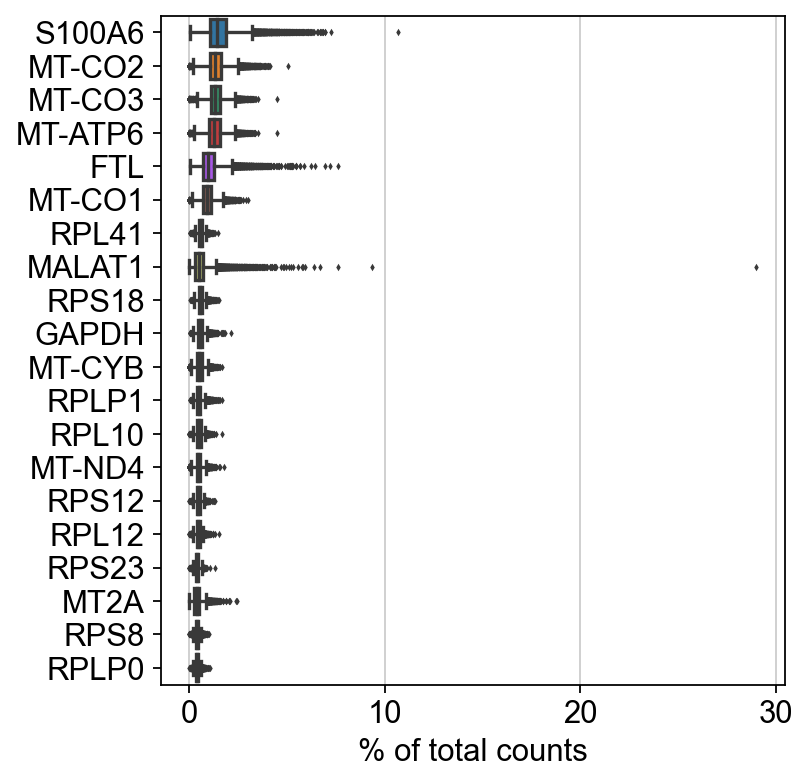

In [13]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [14]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 6388 genes that are detected in less than 3 cells


In [15]:
adata.shape

(29348, 30213)

In [16]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

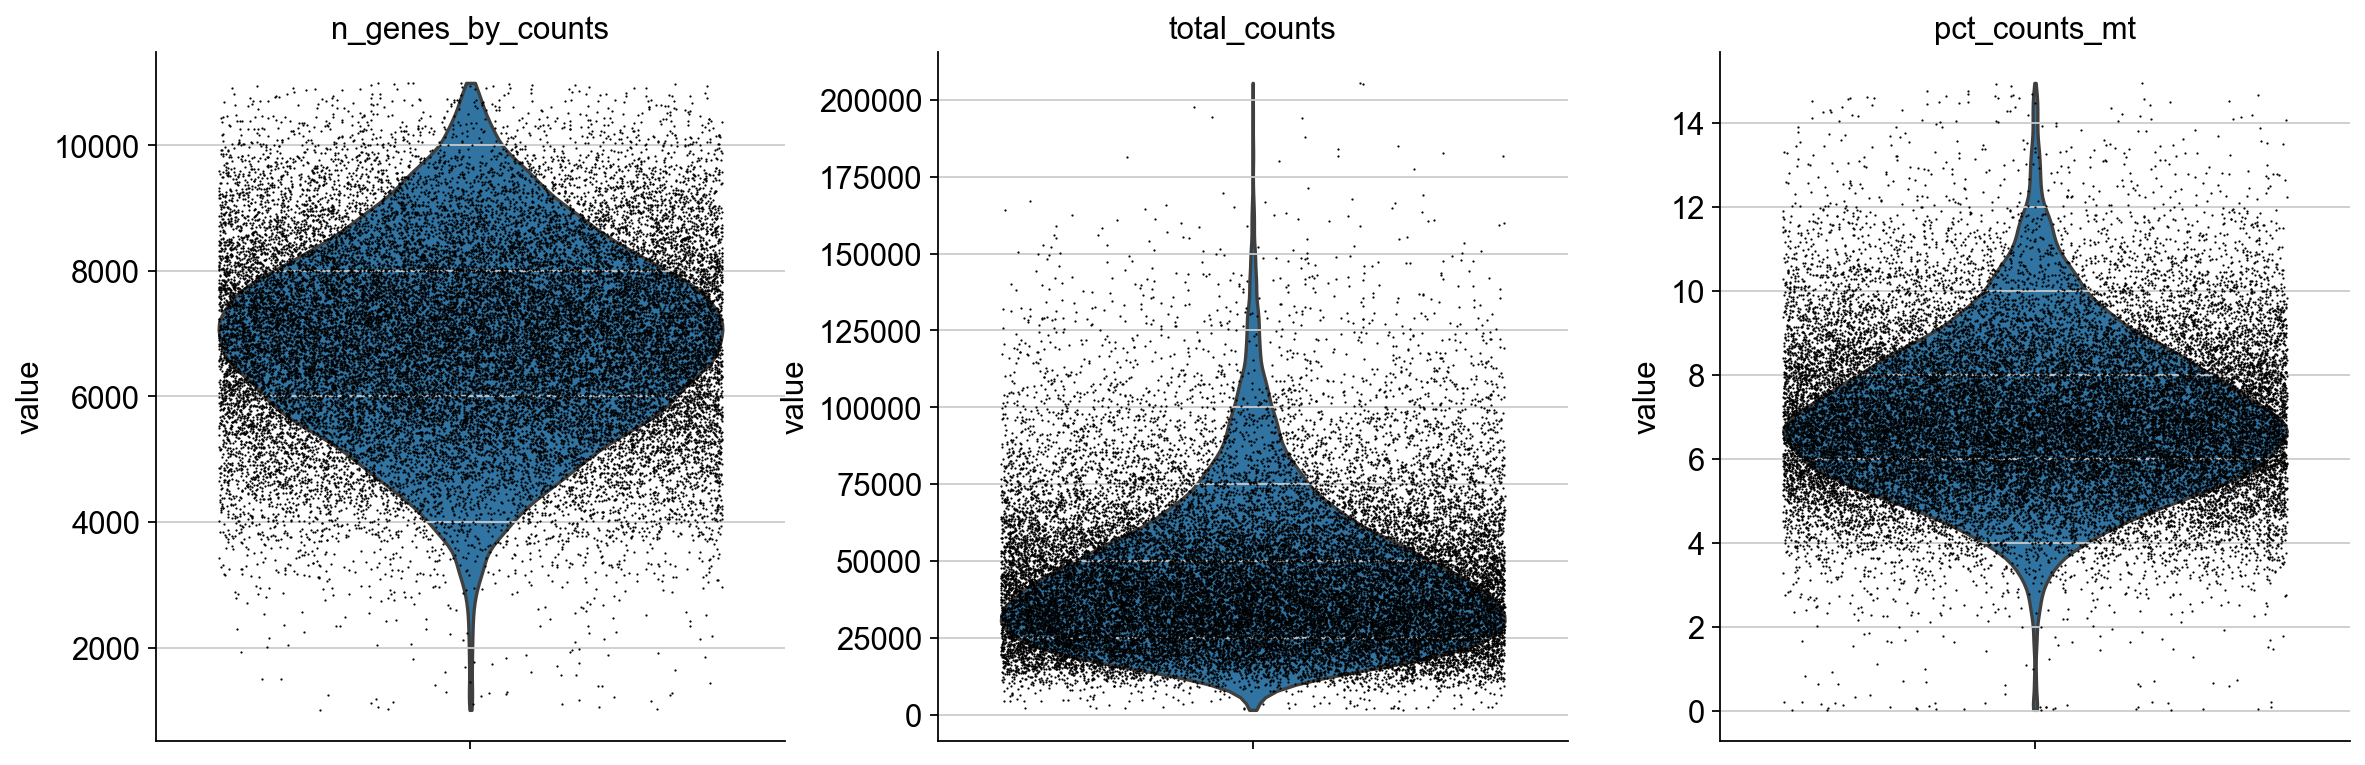

In [17]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

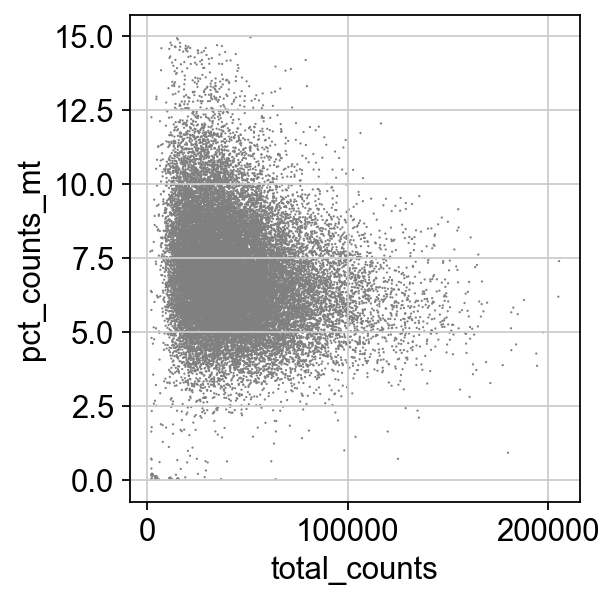

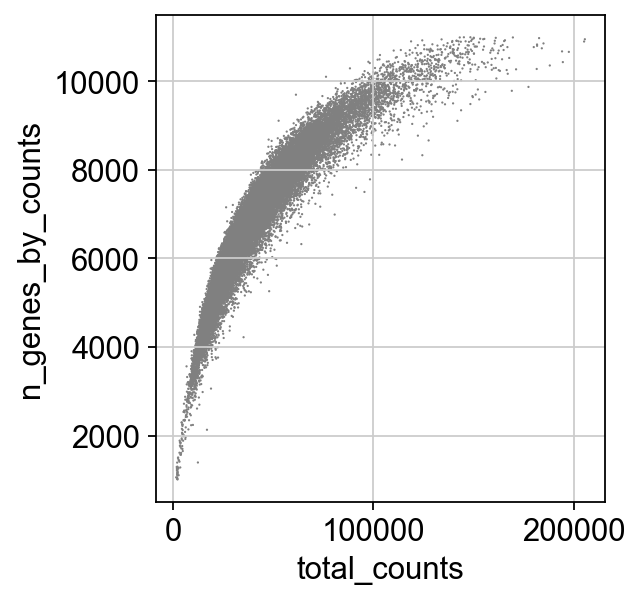

In [18]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt',)
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [19]:
adata = adata[adata.obs.pct_counts_mt < 15, :]

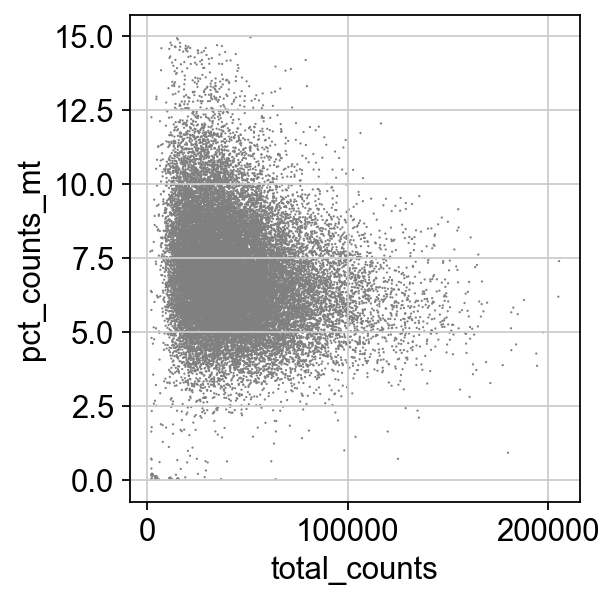

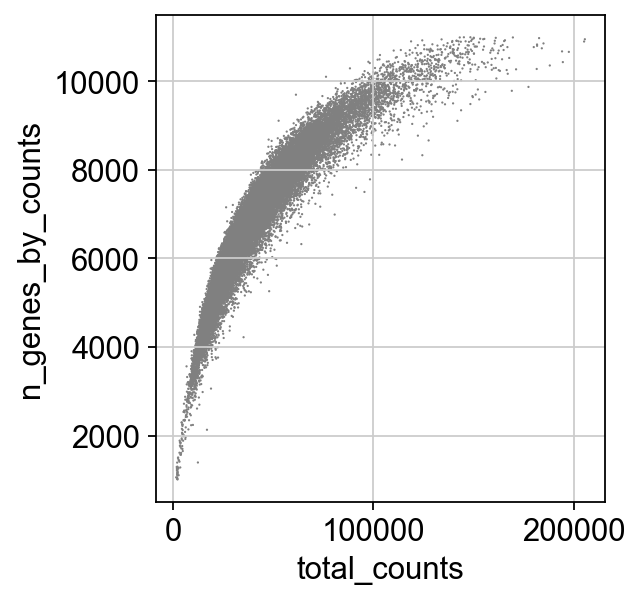

In [20]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt',)
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [21]:
adata.shape

(29348, 30213)

In [22]:
### remove ('hsa-miR-92a-3p', ['miR_1:TCACAAGTCGGCATAT-1']) from adata
cells_to_keep = [cell for cell in adata.obs.index.to_list() if cell != 'miR_1:TCACAAGTCGGCATAT-1']
adata = adata[cells_to_keep,:]

In [23]:
adata.shape

(29347, 30213)

In [24]:
### making all 20 control guides the same annotation
meta = adata.obs
meta = meta.astype({'guide':'string'})
meta.loc[meta.loc[:,'guide'] == 'NA', 'guide'] = 'TuD_NC'
meta = meta.astype({'guide':'category'})
adata.obs = meta
meta.dtypes

sample               category
barcode              category
guide                category
lor                   float64
pvalue                float64
adj_pvalue            float64
max_umi               float64
n_umi                 float64
m_umi                 float64
v_umi                 float64
log_max_umi           float64
log_n_umi             float64
log_m_umi             float64
n_genes                 int64
n_genes_by_counts       int32
total_counts          float32
total_counts_mt       float32
pct_counts_mt         float32
dtype: object

In [25]:
#### LOADING

import shelve
filenm = '/home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_R10000_K1_C1_T10000_newest_edits_100cells_shap/shap_output_and_selected_cells.out'
my_shelf = shelve.open(filenm)
for key in my_shelf:
    globals()[key]=my_shelf[key]
my_shelf.close()

In [26]:
## pull out miR order
one_hot_df = pd.get_dummies(adata.obs["guide"])
miR_order = list(one_hot_df.columns)

In [27]:
## pull out shap values only for miRs found in selected cells
select_cell_miRs_all = list(dict_out['sample_names'])
select_cell_miRs = list(dict_out['sample_names'].unique())
select_miR_shap_values = [dict_out['Shap.values'][index] for index, miR in enumerate(miR_order) if miR in select_cell_miRs]
feature_names = dict_out['feature_names']


In [28]:
%%R -i select_miR_shap_values,select_cell_miRs,feature_names,select_cell_miRs_all
select_miR_shap_values_list = list()
for (i in 1:dim(select_miR_shap_values)[3]){
    select_miR_shap_values_list[[i]] = select_miR_shap_values[,,i]
    select_miR_shap_values_list[[i]] = as.data.frame(select_miR_shap_values_list[[i]])
    colnames(select_miR_shap_values_list[[i]]) = feature_names
    select_miR_shap_values_list[[i]]$miR = select_cell_miRs_all
}
names(select_miR_shap_values_list) = select_cell_miRs

In [81]:
%%R
## getting mean shap values by miR
library(dplyr)
select_miR_shap_values_meaned_by_miR = lapply(select_miR_shap_values_list, function(x) return(summarize_all(group_by(x, miR),mean)))
select_miR_shap_values_meaned_by_miR = lapply(select_miR_shap_values_meaned_by_miR, as.data.frame)

In [ ]:
%%R
saveRDS(select_miR_shap_values_meaned_by_miR, '/home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_R10000_K1_C1_T10000_newest_edits_100cells_shap/select_miR_shap_values_meaned_by_miR.RData')

In [29]:
%%R
select_miR_shap_values_meaned_by_miR = readRDS('/home/ssobti/projects/mir_tud/output_data/mave_output/MAVE_trial_R10000_K1_C1_T10000_newest_edits_100cells_shap/select_miR_shap_values_meaned_by_miR.RData')

In [30]:
%%R
## load in TargetScan miR target predictions
predicted_targets = read.csv('/home/ssobti/projects/mir_tud/uploaded_data/Predicted_Targets_Info.txt', sep='\t', header=T)

In [31]:
%%R -i select_cell_miRs_all
intersect(unique(predicted_targets$miR.Family), names(select_miR_shap_values_meaned_by_miR))
match(unique(predicted_targets$miR.Family), names(select_miR_shap_values_meaned_by_miR))


  [1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [26] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [51] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [76] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[101] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[126] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[151] NA NA NA


In [38]:
%%R
bb = gsub("-5p$", "", gsub("-3p$", "", unique(predicted_targets$miR.Family)))
bb2 = gsub("-5p$", "", gsub("-3p$", "", names(select_miR_shap_values_meaned_by_miR)))
intersect(bb,bb2)

[1] "miR-183" "miR-653" "miR-126" "miR-210" "miR-191"


In [39]:
%%R
vv = sapply(names(select_miR_shap_values_meaned_by_miR), function(x) agrep(x, unique(predicted_targets$miR.Family)))
vv2 = sapply(bb2, function(x) agrep(x, bb))


In [143]:
%%R
which(unlist(lapply(vv, function(x) length(x) > 0))) %>% length()

[1] 22
